# 04 카운트 기반의 단어 표현

### 1) 다양한 단어의 표현 방법

1. 단어의 표현 방법

- 국소 표현 Local Representation (이산 표현 Discrete Representation)

  ex. '강아지', '귀여운', '사랑스러운' -> 1, 2, 3 mapping

- 분산 표현 Disrtibuted Representation (분산 표현 Distributed Representation)

  ex. '강아지'라는 단어 근처에 '귀여운', '사랑스러운'이 자주 등장하므로, '강아지'라는 단어는 '귀여운', '사랑스러운'이라는 느낌이다. (단어의 의미 표현 가능)

2. 단어 표현의 카테고리화

  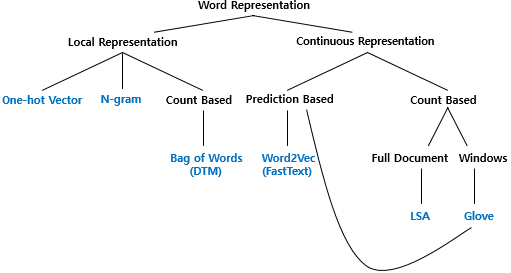


### 2) Bag of Words

1. Bag of Words 란?

단어들의 순서는 고려하지 않고, 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법

- BoW 만드는 과정

```
(1) 각 단어에 고유한 정수 인덱스를 부여합니다.  # 단어 집합 생성.
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.  
```

2. BoW 예제

In [2]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


3. CounterVectorizer 클래스로 BoW 생성 (영어)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


4. 불용어 제외 (전처리)

### 3) 문서 단어 행렬 Document-Term Matrix, DTM

1. 문서 단어 행렬의 표기법

다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현

2. 문서 단어 행렬의 한계

- 희소 표현 : 대부분 값이 0이 된다. 따라서 많은 양의 저장 공간과 높은 계산 복잡도를 요구한다. 이는 전처리를 이용하여 어느 정도는 해소가 가능하다.

- 단순 빈도 수 기반 접근 : 불용어의 빈도 수 가 높다고 해서 유사한 문서로 판별할 수 없다.


### 4) TF-IDF (Term Frequency-Inverse Document Frequency)

1. TF-IDF
  
  단어의 빈도와 역 문서 문서를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 두는 방법

  - TF와 IDF를 곱한 값

    TF : 특정 문서에서 특정 단어의 등장 횟수

    IDF : 특정 단어가 등장한 문서의 수에 반비례하는 수

  모든 문서에만 자주 등장하는 단어는 중요도가 낮다고 판다하며, 특정 문서에만 자주 등장하는 단어는 중요도가 높다고 판단

2. 파이썬으로 TF-IDF 구현

In [7]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort() # 단어 리스트

N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

result = []

for i in range(N): # TF, DTM 구하기
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])

result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


3. 사이킷 런을 이용한 DTM과 TF-IDF 실습

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
